<a href="https://colab.research.google.com/github/Leothorn/EIP4/blob/master/Assignment_1_EIP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


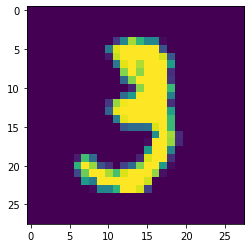

In [42]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[10])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [45]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [47]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.layers import Activation

model = Sequential() 
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(128, 3, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(512, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  


In [49]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 512)       590336    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 512)         2359808   
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 10)          5130      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [51]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 20s 332us/step - loss: 0.1321 - acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.0482 - acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0349 - acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0286 - acc: 0.9910
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0214 - acc: 0.9935
Epoch 6/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0186 - acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 19s 316us/step - loss: 0.0146 - acc: 0.9953
Epoch 8/10
60000/60000 [==============================] - 19s 315us/step - loss: 0.0126 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 19s 318us/step - loss: 0.0118 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 19s 317us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [53]:
print(score)

[0.034099743980910355, 0.9912]


In [0]:
y_pred = model.predict(X_test)

In [55]:
print(y_pred[:9])
print(y_test[:9])

[[4.65349227e-20 2.95171394e-15 1.95489389e-11 5.85061513e-14
  9.34606736e-21 2.30135543e-18 1.48415460e-35 1.00000000e+00
  9.89972928e-22 1.60429200e-12]
 [2.06518742e-20 6.16228531e-14 1.00000000e+00 1.52612057e-16
  7.43563509e-20 4.74025039e-25 8.24810740e-18 2.37727928e-20
  1.69735993e-18 2.69418624e-23]
 [2.04808281e-14 1.00000000e+00 9.91013261e-12 4.76159029e-14
  2.47964440e-08 5.57957153e-12 3.43437453e-12 7.10058812e-09
  9.01723019e-14 5.39959874e-12]
 [1.00000000e+00 3.14145660e-17 1.25893879e-10 5.08361853e-13
  2.50316261e-11 1.67998058e-14 3.61098290e-10 9.36045755e-11
  8.20086055e-10 1.53560489e-08]
 [1.15304139e-14 7.05447287e-17 6.99887691e-18 6.81844350e-24
  1.00000000e+00 2.57723168e-16 3.73024008e-12 3.38585803e-17
  3.25226703e-14 1.00180575e-08]
 [2.43012452e-13 9.99996305e-01 1.75208917e-10 1.19154782e-11
  2.80218160e-06 1.40445717e-12 3.05411702e-13 9.10804715e-07
  5.11240399e-12 2.55687249e-09]
 [1.40361714e-18 4.59601870e-11 7.54667308e-15 1.28309112e